In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib.pyplot import *


In [2]:
d15=np.loadtxt('d15.txt')
d16=np.loadtxt('d16.txt')
d15[:,0:1]=d15[:,0:1]/2.1
d16[:,0:1]=d16[:,0:1]/2.1
D=np.concatenate([d15,d16])
y=D[:,0]
X=D[:,1:(len(D.T)-1)]
X[:,1]=X[:,1]/100

In [12]:
d16.shape

(1797, 6)

In [4]:
def create_mat(X_train,poly):
    #print(poly)
    
    fct=poly//(len(X_train.T)+1)
    #print(fct)
    
    X=np.zeros((len(X_train),1))
    #print(np.shape(X))
    poww=1
    ct=1
    ctt=0
    while ct<=poly:
        rem=ct%5
        poww=ct//5 +1

        #print(rem)
        if rem==0:
            X=np.append(X,np.zeros((len(X_train),3)),axis=1)
            
            X[:,ctt:ctt+4]=X_train**(poww-1)
            
            ctt=ctt+4
            if ct<poly:
                X=np.append(X,np.zeros((len(X_train),1)),axis=1)
        elif rem==1:

            #print(X)
            X[:,ctt]=X_train[:,0]**poww
        elif rem==2:
            X[:,ctt]=X_train[:,1]**poww
        elif rem==3:
            X[:,ctt]=X_train[:,2]**poww
        else:
            X[:,ctt]=X_train[:,3]**poww
        ct=ct+1
    return X
    
number_splits=1
poly =1

split=np.arange(1,number_splits,1)

r2_1 = np.zeros((len(split),poly))
r2_2 = np.zeros((len(split),poly))
r2_3 = np.zeros((len(split),poly))
r2_4 = np.zeros((len(split),poly))

for i in range(len(split)):
    for j in range(poly):
        XX=create_mat(X,j+1)
        XX=np.append(XX,np.ones((len(XX),1)),axis=1)
        X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state=split[i])
        #XX_train=create_mat(X_train,j+1)
#         clf1 = linear_model.Lasso(alpha=1.0,max_iter=5000)
#         clf2 = linear_model.Lasso(alpha=0.001,max_iter=5000)
#         clf3 = linear_model.Ridge()
        clf4 = linear_model.LinearRegression()

#         clf1.fit(X_train,y_train)
#         clf2.fit(X_train,y_train)
#         clf3.fit(X_train,y_train)
        clf4.fit(X_train,y_train)
        
#         y_pred1 = clf1.predict(X_test)
#         y_pred2 = clf2.predict(X_test)
#         y_pred3 = clf3.predict(X_test)
        y_pred4 = clf4.predict(X_test)
        
#         r2_1[i,j]=r2_score(y_test, y_pred1)
#         r2_2[i,j]=r2_score(y_test, y_pred2)
#         r2_3[i,j]=r2_score(y_test, y_pred3)
        r2_4[i,j]=r2_score(y_test, y_pred4)
        
        
 
  

In [4]:
# r2m_1=np.mean(r2_1, axis=1)
# r2m_2=np.mean(r2_2, axis=1)
# r2m_3=np.mean(r2_3, axis=1)
r2m_4=np.mean(r2_4, axis=0)

/Users/sid/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sid/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


nan


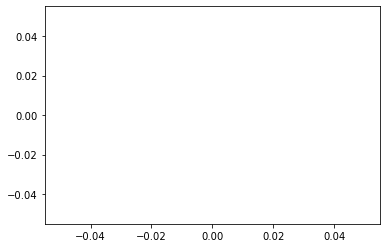

In [5]:
# plot(r2m_1)
# plot(r2m_2)
# plot(r2m_3)
plot(r2m_4)
# print(np.max(r2m_1))
# print(np.max(r2m_2))
# print(np.max(r2m_3))
print(np.max(r2m_4))

In [6]:
d=np.argmax(r2m_4)
print(d)

0


In [5]:
from sklearn.metrics import mean_squared_error
poly=21
j=poly

number_splits=50

split=np.arange(1,number_splits,1)


bins = np.arange(0,6,1)
pred_score_train=np.zeros((number_splits,len(bins)))
pred_score_test=np.zeros((number_splits,len(bins)))

for i in range(len(split)):
#     for j in range(poly):
    XX=create_mat(X,poly+1)
    XX=np.append(XX,np.ones((len(XX),1)),axis=1)
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.4, random_state=split[i])
    #XX_train=create_mat(X_train,j+1)
#         clf1 = linear_model.Lasso(alpha=1.0,max_iter=5000)
#         clf2 = linear_model.Lasso(alpha=0.001,max_iter=5000)
#         clf3 = linear_model.Ridge()
    clf4 = linear_model.LinearRegression()

#         clf1.fit(X_train,y_train)
#         clf2.fit(X_train,y_train)
#         clf3.fit(X_train,y_train)
    clf4.fit(X_train,y_train)
    
    
    inds = np.digitize(y_train, bins)
    for ct in range(len(bins)):
       
        y_bin = y_train[inds == ct+1]
        x_bin = X_train[inds == ct+1,:]
        if len(x_bin)==0:
            continue
#         GPR_score[i,ct]=mean_squared_error(gpr.predict(x_bin), y_bin)
        pred_score_train[i,ct]=mean_squared_error(clf4.predict(x_bin), y_bin)
    
    inds = np.digitize(y_test, bins)
    for ct in range(len(bins)):
       
        y_bin = y_test[inds == ct+1]
        x_bin = X_test[inds == ct+1,:]
        if len(x_bin)==0:
            continue
#         GPR_score[i,ct]=mean_squared_error(gpr.predict(x_bin), y_bin)
        pred_score_test[i,ct]=mean_squared_error(clf4.predict(x_bin), y_bin)
#     print(GPR_score[i,:])
#     print('train=',pred_score_train[i,:])
#     print('test=',pred_score_test[i,:])

pred_score_test_mean=np.mean(pred_score_test,axis=0)
pred_score_test_mean_std=np.std(pred_score_test,axis=0)

print(pred_score_test_mean)
print(pred_score_test_mean_std)

pred_score_train_mean=np.mean(pred_score_train,axis=0)
pred_score_train_mean_std=np.std(pred_score_train,axis=0)

print(pred_score_train_mean)
print(pred_score_train_mean_std)        
 


[0.04509652 0.29860105 1.15035651 4.96894959 4.02461672 8.71284862]
[6.97630223e-03 5.02016191e-02 2.92284639e-01 1.15439078e+00
 1.46880242e+00 1.02410507e+01]
[ 0.04501447  0.29846838  1.13076317  5.37167808  3.57239411 11.21271966]
[6.55535039e-03 4.57551598e-02 2.24419701e-01 1.00063803e+00
 9.16371998e-01 9.94510536e+00]


In [6]:
clf4.coef_

array([-1.73399180e-02,  9.78276020e+00, -2.02241489e-02,  1.01798028e-02,
        2.04923224e-02, -3.43956852e+01,  1.85974190e-02, -5.21796606e-04,
       -1.96087239e-03,  6.30392522e+01, -1.85525996e-03,  9.17400866e-06,
        7.04156969e-05, -5.77232056e+01,  4.98958249e-05, -4.82592988e-08,
        2.11185836e+01,  0.00000000e+00])

In [16]:
x_bin.shape

(1, 18)

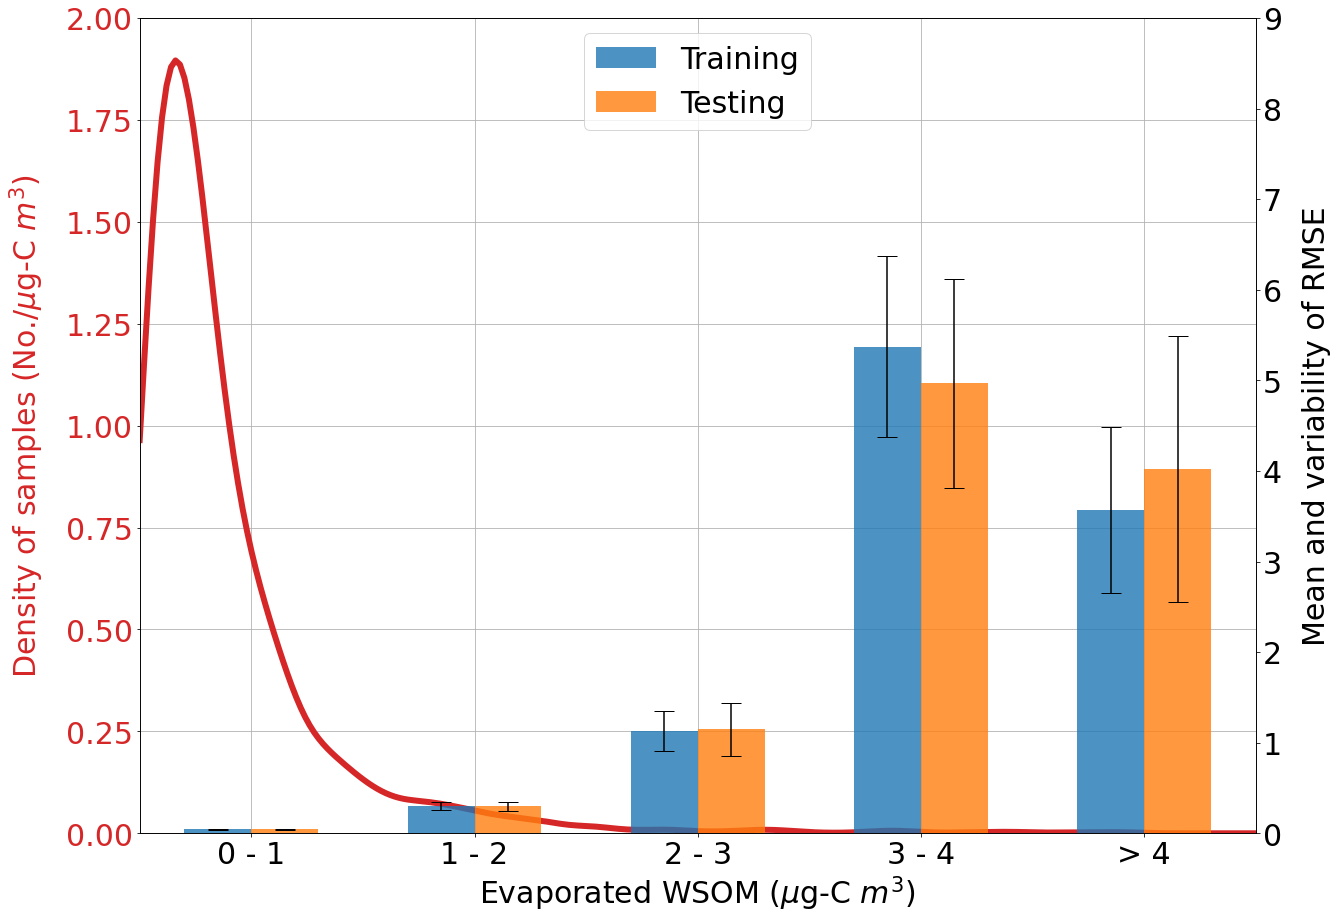

In [17]:
from scipy.stats import norm, gaussian_kde
x = np.arange(5)+0.5  # the label locations
#x = np.arange(0,12,0.5)  # the label locations

width = 0.3  # the width of the bars

fig = figure(figsize=(20,15))
ax2 = fig.add_subplot(1,1,1)

 # instantiate a second axes that shares the same x-axis
yticks(fontsize=30)
xticks(fontsize=30)
scipy_kernel = gaussian_kde(y)
u = np.linspace(0,10,500)
v = scipy_kernel.evaluate(u)
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Density of samples (No./$\mu$g-C ${m}^3$)',color = color,size = 30,labelpad=20)
# ax2.set_ylim([0,1])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax = ax2.twinx() 
rects1 = ax.bar(x - width/2, pred_score_train_mean[:-1],width, yerr=pred_score_train_mean_std[:-1],ecolor='black', capsize=10,alpha=0.8, label='Training')
rects2 = ax.bar(x + width/2, pred_score_test_mean[:-1], width, yerr=pred_score_test_mean_std[:-1],ecolor='black', capsize=10,alpha=0.8, label='Testing')
ax.set_ylabel('')
#ax.set_title('Performance analysis for 100 random splits of data',size = 30)
ax.set_xticks(x-0.5)
#ax.set_xticks(['0','0.5'])
xticks([0.5,1.5,2.5,3.5,4.5],['0 - 1','1 - 2','2 - 3','3 - 4','> 4'],fontsize=30)
yticks(fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([-0,9])
ax2.set_ylim([-0,2])
ax.legend(prop = {'size':30},loc=9)
ax2.set_xlabel('Evaporated WSOM ($\mu$g-C ${m}^3$)',size = 30)
ax2.plot(u,v,color = color,lw = 6)
ax.set_ylabel('Mean and variability of RMSE',size = 30,labelpad=20)

ax2.grid(True)
fig.savefig("Plot_poly.pdf", bbox_inches='tight')
show()



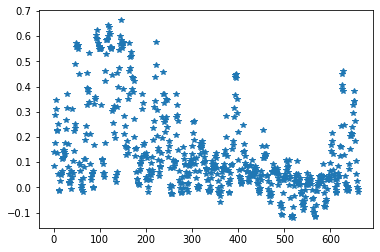

In [29]:
import pandas as pd
A=np.array(pd.read_excel('atl.xlsx'))
A[:,1]=A[:,1]/100
XX=create_mat(A,poly+1)
XX=np.append(XX,np.ones((len(XX),1)),axis=1)
y_atl=clf4.predict(XX)
plot(y_atl,'*')
np.savetxt('y_atl_poly.txt',y_atl)

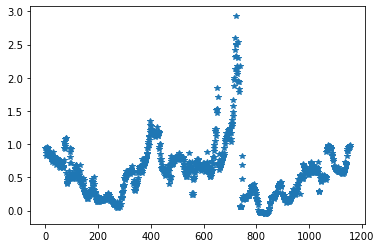

In [7]:
import pandas as pd
d17=np.array(pd.read_excel('summer_2017.xlsx'))
d17[:,2]=d17[:,2]/100
Y17=d17[:,0]
X17=d17[:,1:]

XX=create_mat(X17,poly+1)
XX=np.append(XX,np.ones((len(XX),1)),axis=1)
y_atl=clf4.predict(XX)
plot(y_atl,'*')
np.savetxt('Y17_poly.txt',y_atl)


In [18]:
from sklearn.metrics import mean_squared_error
poly=4
j=poly

number_splits=50

split=np.arange(1,number_splits,1)


bins = np.arange(0,6,1)
pred_score_train=np.zeros((number_splits,len(bins)))
pred_score_test=np.zeros((number_splits,len(bins)))

for i in range(len(split)):
#     for j in range(poly):
    XX=create_mat(X,poly+1)
    XX=np.append(XX,np.ones((len(XX),1)),axis=1)
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.4, random_state=split[i])
    #XX_train=create_mat(X_train,j+1)
#         clf1 = linear_model.Lasso(alpha=1.0,max_iter=5000)
#         clf2 = linear_model.Lasso(alpha=0.001,max_iter=5000)
#         clf3 = linear_model.Ridge()
    clf4 = linear_model.LinearRegression()

#         clf1.fit(X_train,y_train)
#         clf2.fit(X_train,y_train)
#         clf3.fit(X_train,y_train)
    clf4.fit(X_train,y_train)
    
    
    inds = np.digitize(y_train, bins)
    for ct in range(len(bins)):
       
        y_bin = y_train[inds == ct+1]
        x_bin = X_train[inds == ct+1,:]
        if len(x_bin)==0:
            continue
#         GPR_score[i,ct]=mean_squared_error(gpr.predict(x_bin), y_bin)
        pred_score_train[i,ct]=mean_squared_error(clf4.predict(x_bin), y_bin)
    
    inds = np.digitize(y_test, bins)
    for ct in range(len(bins)):
       
        y_bin = y_test[inds == ct+1]
        x_bin = X_test[inds == ct+1,:]
        if len(x_bin)==0:
            continue
#         GPR_score[i,ct]=mean_squared_error(gpr.predict(x_bin), y_bin)
        pred_score_test[i,ct]=mean_squared_error(clf4.predict(x_bin), y_bin)
#     print(GPR_score[i,:])
#     print('train=',pred_score_train[i,:])
#     print('test=',pred_score_test[i,:])

pred_score_test_mean=np.mean(pred_score_test,axis=0)
pred_score_test_mean_std=np.std(pred_score_test,axis=0)

print(pred_score_test_mean)
print(pred_score_test_mean_std)

pred_score_train_mean=np.mean(pred_score_train,axis=0)
pred_score_train_mean_std=np.std(pred_score_train,axis=0)

print(pred_score_train_mean)
print(pred_score_train_mean_std)      
 
  

[0.04765163 0.28218544 1.33210327 5.25126579 6.03946385 8.89770411]
[7.36133254e-03 4.75480704e-02 2.84932022e-01 1.01928272e+00
 1.55941955e+00 1.04566788e+01]
[ 0.04817082  0.285338    1.34604623  5.60667863  6.25509529 11.73994696]
[7.07340785e-03 4.40187591e-02 2.42322792e-01 9.54941980e-01
 9.45607526e-01 1.04077058e+01]


In [19]:
clf4.coef_

array([0.08679339, 0.73164943, 0.03039917, 0.00147944, 0.        ])

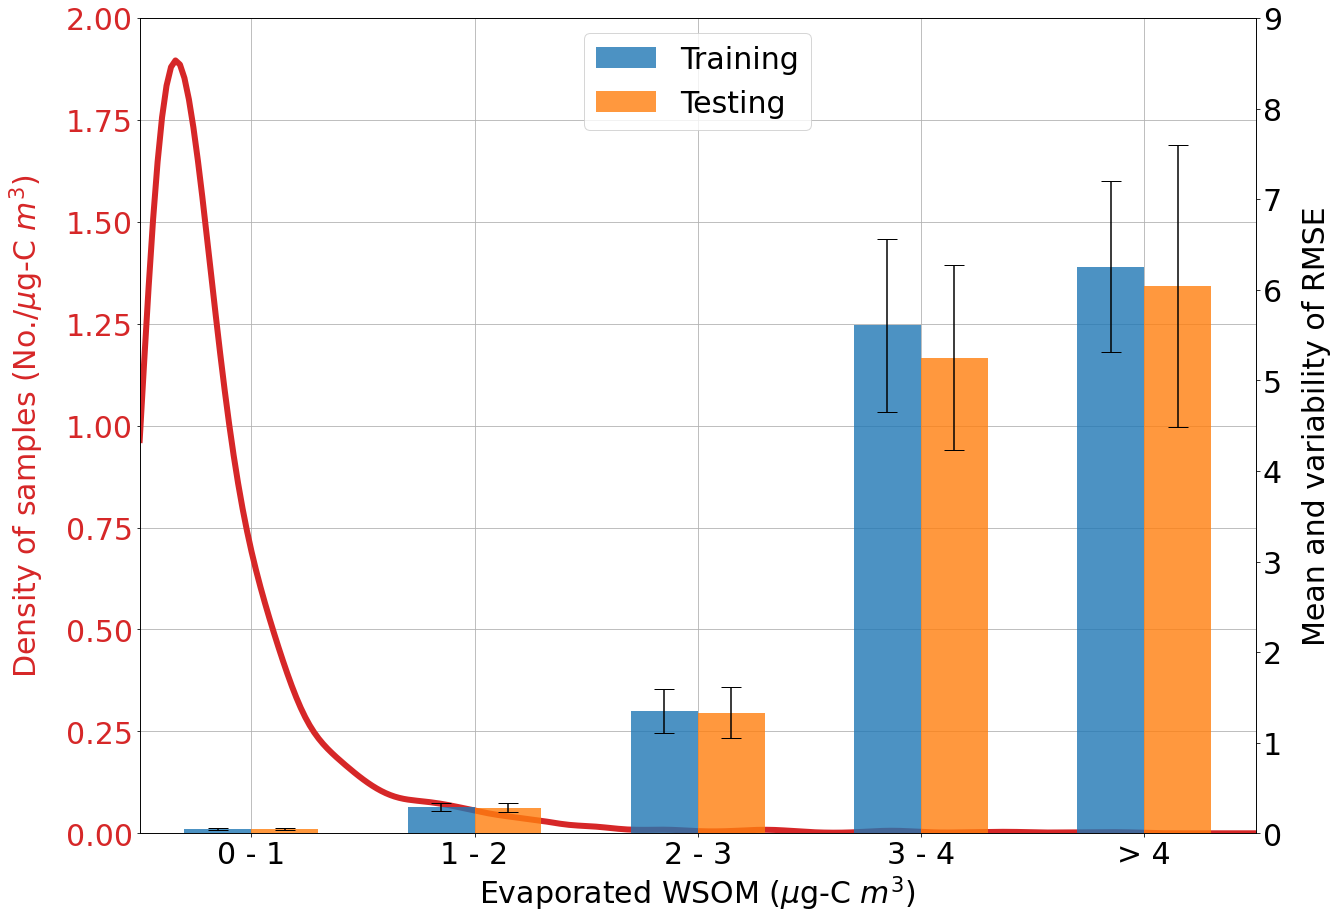

In [20]:
from scipy.stats import norm, gaussian_kde
x = np.arange(5)+0.5  # the label locations
#x = np.arange(0,12,0.5)  # the label locations

width = 0.3  # the width of the bars

fig = figure(figsize=(20,15))
ax2 = fig.add_subplot(1,1,1)

 # instantiate a second axes that shares the same x-axis
yticks(fontsize=30)
xticks(fontsize=30)
scipy_kernel = gaussian_kde(y)
u = np.linspace(0,10,500)
v = scipy_kernel.evaluate(u)
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Density of samples (No./$\mu$g-C ${m}^3$)',color = color,size = 30,labelpad=20)
# ax2.set_ylim([0,1])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax = ax2.twinx() 
rects1 = ax.bar(x - width/2, pred_score_train_mean[:-1],width, yerr=pred_score_train_mean_std[:-1],ecolor='black', capsize=10,alpha=0.8, label='Training')
rects2 = ax.bar(x + width/2, pred_score_test_mean[:-1], width, yerr=pred_score_test_mean_std[:-1],ecolor='black', capsize=10,alpha=0.8, label='Testing')
ax.set_ylabel('')
#ax.set_title('Performance analysis for 100 random splits of data',size = 30)
ax.set_xticks(x-0.5)
#ax.set_xticks(['0','0.5'])
xticks([0.5,1.5,2.5,3.5,4.5],['0 - 1','1 - 2','2 - 3','3 - 4','> 4'],fontsize=30)
yticks(fontsize=30)
ax.set_xlim([0,5])
ax.set_ylim([-0,9])
ax2.set_ylim([-0,2])
ax.legend(prop = {'size':30},loc=9)
ax2.set_xlabel('Evaporated WSOM ($\mu$g-C ${m}^3$)',size = 30)
ax2.plot(u,v,color = color,lw = 6)
ax.set_ylabel('Mean and variability of RMSE',size = 30,labelpad=20)

ax2.grid(True)
fig.savefig("Plot_lin.pdf", bbox_inches='tight')
show()



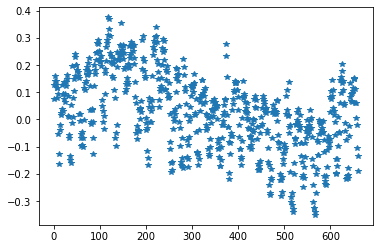

In [21]:
import pandas as pd
A=np.array(pd.read_excel('atl.xlsx'))
A[:,1]=A[:,1]/100
XX=create_mat(A,poly+1)
XX=np.append(XX,np.ones((len(XX),1)),axis=1)
y_atl=clf4.predict(XX)
plot(y_atl,'*')
np.savetxt('y_atl_lin.txt',y_atl)

In [6]:
import pandas as pd
d17=np.array(pd.read_excel('summer_2017.xlsx'))
d17[:,2]=d17[:,2]/100
Y17=d17[:,0]
X17=d17[:,1:]

XX=create_mat(X17,poly+1)
XX=np.append(XX,np.ones((len(XX),1)),axis=1)
y_atl=clf4.predict(XX)
plot(y_atl,'*')
np.savetxt('Y17_lin.txt',y_atl)


NameError: name 'create_mat' is not defined

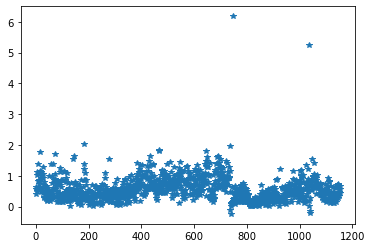

In [9]:
plot(Y17,'*')

# With Filtered Data

In [ ]:
yindex = y<2
yy=y[yindex]
XX=X[yindex]
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XX_before_scaling=XX
XX = scaler.fit_transform(XX)

In [ ]:
def create_mat(X_train,poly):
    #print(poly)
    
    fct=poly//(len(X_train.T)+1)
    #print(fct)
    
    X=np.zeros((len(X_train),1))
    #print(np.shape(X))
    poww=1
    ct=1
    ctt=0
    while ct<=poly:
        rem=ct%5
        poww=ct//5 +1

        #print(rem)
        if rem==0:
            X=np.append(X,np.zeros((len(X_train),3)),axis=1)
            
            X[:,ctt:ctt+4]=X_train**(poww-1)
            
            ctt=ctt+4
            if ct<poly:
                X=np.append(X,np.zeros((len(X_train),1)),axis=1)
        elif rem==1:

            #print(X)
            X[:,ctt]=X_train[:,0]**poww
        elif rem==2:
            X[:,ctt]=X_train[:,1]**poww
        elif rem==3:
            X[:,ctt]=X_train[:,2]**poww
        else:
            X[:,ctt]=X_train[:,3]**poww
        ct=ct+1
    return X
    
number_splits=50
poly =50

split=np.arange(1,number_splits,1)

r2_1 = np.zeros((len(split),poly))
r2_2 = np.zeros((len(split),poly))
r2_3 = np.zeros((len(split),poly))
r2_4 = np.zeros((len(split),poly))

for i in range(len(split)):
    for j in range(poly):
        XXX=create_mat(XX,j+1)
        XXX=np.append(XX,np.ones((len(XX),1)),axis=1)
        X_train, X_test, y_train, y_test = train_test_split(XXX, yy, test_size=0.25, random_state=split[i])
        #XX_train=create_mat(X_train,j+1)
        clf1 = linear_model.Lasso(alpha=1.0,max_iter=5000)
        clf2 = linear_model.Lasso(alpha=0.001,max_iter=5000)
        clf3 = linear_model.Ridge()
        clf4 = linear_model.LinearRegression()

        clf1.fit(X_train,y_train)
        clf2.fit(X_train,y_train)
        clf3.fit(X_train,y_train)
        clf4.fit(X_train,y_train)
        
        y_pred1 = clf1.predict(X_test)
        y_pred2 = clf2.predict(X_test)
        y_pred3 = clf3.predict(X_test)
        y_pred4 = clf4.predict(X_test)
        
        r2_1[i,j]=r2_score(y_test, y_pred1)
        r2_2[i,j]=r2_score(y_test, y_pred2)
        r2_3[i,j]=r2_score(y_test, y_pred3)
        r2_4[i,j]=r2_score(y_test, y_pred4)
        print(i,j,r2_4[i,j])
  